## Lectura y gráfica de una Señal

### Importación de librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy import signal

##### Abrir archivo txt

In [2]:
f = open("SenalECG/ECG_Reposo_Sujeto1.txt","r")
raw_data = f.readlines()[1] # con f.read() leemos todo el contenido
f.close()

raw_data

'# {"98:D3:71:FD:62:1E": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:71:FD:62:1E", "device connection": "BTH98:D3:71:FD:62:1E", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2023-9-15", "time": "9:42:29.8", "channels": [2], "sensor": ["ECGBIT"], "label": ["A2"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A2"], "special": [{}], "digital IO": [0, 0, 1, 1]}}\n'

In [3]:
x = re.findall("[0-5][0-9]\d", raw_data)

print(x)

['100', '128', '202']


In [4]:
Fs = float(x[0])
Fs = Fs * 10
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000.0 hz
 Ts=0.001 s


## Leer archivo excluyendo 2 primeras filas

In [36]:
SenalReposo = np.genfromtxt("SenalECG/ECG_Reposo_Sujeto1.txt", delimiter="\t",skip_header = 3)
SenalEjercicio = np.genfromtxt("SenalECG/ECG_ActividadFisica_Sujeto1.txt", delimiter="\t", skip_header=3)

## Visualización de la señal

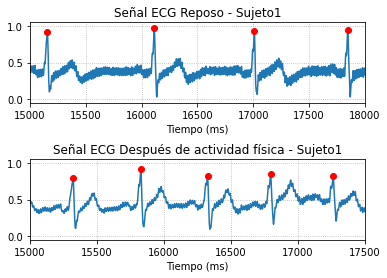

In [75]:
#Señal en reposo -Normalizacion
y1 = (SenalReposo[:, 5])
y2 = (SenalEjercicio[:, 5])
y1 = y1  - np.min(y1)
y1 = y1 / np.max(y1)
t1 = (np.arange(0,len(y1)) / Fs)
ind_peaks1, _ = signal.find_peaks(y1, height= 0.8)
ind_time1 = t1[ind_peaks1]

#Señal Después de actividad física - Normalizacion
y2 = y2 - np.min(y2)
y2 = y2 / np.max(y2)
t2 = (np.arange(0,len(y2)) / Fs)
ind_peaks2, _ = signal.find_peaks(y2, height= 0.77)
ind_time2 = t2[ind_peaks2]

#Graficos señales
plt.figure()
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.7)
plt.plot(y1, label="señal Reposo") 
plt.plot(ind_peaks1, y1[ind_peaks1], 'ro')
plt.title("Señal ECG Reposo - Sujeto1")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (ms)")
plt.xlim(15000,18000)

plt.subplot(2,1,2)
plt.plot(y2, label="señal Actividad Físida")  
plt.plot(ind_peaks2, y2[ind_peaks2], 'ro')
plt.title("Señal ECG Después de actividad física - Sujeto1")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (ms)")
plt.xlim(15000,17500)

fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('ECG_Sujeto1.png', transparent=False, )
plt.show()

#### Hallando la frecuencia cardíaca

In [109]:
fc1 = int(60 / (np.diff(ind_peaks1[16:18]) * (1/Fs)))
fc2 = int(60 / (np.diff(ind_peaks2[58:60]) * (1/Fs)))
print (f"La frecuencia cardiaca del sujeto 1 en reposo fue: {fc1}; mientras que su frecuencia cardiaca después del ejercicio fue {fc2}")

La frecuencia cardiaca del sujeto 1 en reposo fue: 62; mientras que su frecuencia cardiaca después del ejercicio fue 118


## Análisis del dominio de la frecuencia

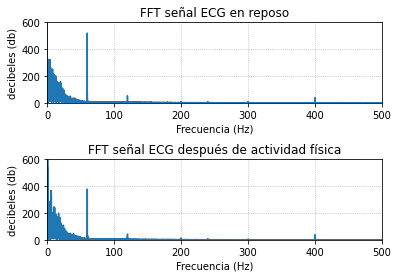

In [129]:
X1 = np.fft.fft(y1) #Transformada de fourier a la primera señal - ECG en reposo
X1 = np.abs(X1)
N1 = len(y1)
f1 = (Fs)*(np.arange(1,N1+1)/N1)

X2 = np.fft.fft(y2) #Transformada de Fourier a la segunda señal - ECG después de actividad física
X2 = np.abs(X2)
N2 = len(y2)
f2 = (Fs)*(np.arange(1,N2+1)/N2)
#Graficamos las transformadas para ver su comportamiento
plt.figure()
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.7)
plt.title("FFT señal ECG en reposo")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)") 
plt.ylabel("decibeles (db)")
plt.plot(f1,X1)
plt.xlim((0, Fs/2))
plt.ylim (0,600)

plt.subplot(2,1,2)
plt.title("FFT señal ECG después de actividad física")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)") 
plt.ylabel("decibeles (db)")
plt.plot(f2,X2)
plt.xlim((0, Fs/2))
plt.ylim (0,600)
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('FFT_Senal.png', transparent=False, )